# Intro

Juan Nunez-Iglesias  
Melbourne Bioinformatics    
University of Melbourne  

<a href="http://elegant-scipy.org">
<img src="https://github.com/elegant-scipy/elegant-scipy/blob/master/_images/cover.jpg?raw=true"
 alt="Elegant SciPy Cover" height=256>
</a>
http://elegant-scipy.org

# Quick example: gene expression, without numpy


|        | Cell type A | Cell type B | Cell type C | Cell type D |
|--------|-------------|-------------|-------------|-------------|
| Gene 0 | 100         | 200         | 50          | 400         |
| Gene 1 | 50          | 0           | 0           | 100         |
| Gene 2 | 350         | 100         | 50          | 200         |

In [1]:
gene0 = [100, 200, 50, 400]
gene1 = [50, 0, 0, 100]
gene2 = [350, 100, 50, 200]
expression_data = [gene0, gene1, gene2] 

Why is this a bad idea?

# Now with NumPy

In [2]:
import numpy as np
a = np.array(expression_data)
print(a)

[[100 200  50 400]
 [ 50   0   0 100]
 [350 100  50 200]]


We are going to:

* Obtain an *RPKM* expression matrix
* Quantile normalize the data

using the awesome power of NumPy

# Inside a numpy ndarray

In [3]:
def print_info(a):
    print('number of elements:', a.size)
    print('number of dimensions:', a.ndim)
    print('shape:', a.shape)
    print('data type:', a.dtype)
    print('strides:', a.strides)
    print('flags:')
    print(a.flags)
    
print_info(a)

number of elements: 12
number of dimensions: 2
shape: (3, 4)
data type: int64
strides: (32, 8)
flags:
  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False


In [4]:
b = a.astype(np.uint8) 
print_info(b)

number of elements: 12
number of dimensions: 2
shape: (3, 4)
data type: uint8
strides: (4, 1)
flags:
  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False


In [5]:
print(a.data)

In [7]:
print(a.ravel()) 

[100 200  50 400  50   0   0 100 350 100  50 200]


In [8]:
abytes = a.ravel().view(dtype=np.uint8)

In [9]:
print_info(abytes)

number of elements: 96
number of dimensions: 1
shape: (96,)
data type: uint8
strides: (1,)
flags:
  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False


In [11]:
print(abytes[:32])

[100   0   0   0   0   0   0   0 200   0   0   0   0   0   0   0  50   0
   0   0   0   0   0   0 144   1   0   0   0   0   0   0]


In [12]:
a.astype(np.uint8)

array([[100, 200,  50, 144],
       [ 50,   0,   0, 100],
       [ 94, 100,  50, 200]], dtype=uint8)

### Example: take the transpose of `a`

In [13]:
print_info(a)

number of elements: 12
number of dimensions: 2
shape: (3, 4)
data type: int64
strides: (32, 8)
flags:
  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False


In [14]:
print_info(a.T)

number of elements: 12
number of dimensions: 2
shape: (4, 3)
data type: int64
strides: (8, 32)
flags:
  C_CONTIGUOUS : False
  F_CONTIGUOUS : True
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False


In [15]:
a.T

array([[100,  50, 350],
       [200,   0, 100],
       [ 50,   0,  50],
       [400, 100, 200]])

In [16]:
a.T.ravel()

array([100,  50, 350, 200,   0, 100,  50,   0,  50, 400, 100, 200])

In [17]:
a.T.ravel(order='F')

array([100, 200,  50, 400,  50,   0,   0, 100, 350, 100,  50, 200])

In [18]:
np.mean(a)

133.33333333333334

### Example: skipping rows and columns with *slicing*

In [19]:
print_info(a.T)

number of elements: 12
number of dimensions: 2
shape: (4, 3)
data type: int64
strides: (8, 32)
flags:
  C_CONTIGUOUS : False
  F_CONTIGUOUS : True
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False


In [20]:
alist = list(range(10))
alist[1:7:2] 

[1, 3, 5]

In [23]:
print_info(a.T[1::2])

number of elements: 6
number of dimensions: 2
shape: (2, 3)
data type: int64
strides: (16, 32)
flags:
  C_CONTIGUOUS : False
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False


In [24]:
print_info(a.T[::2, ::2])

number of elements: 4
number of dimensions: 2
shape: (2, 2)
data type: int64
strides: (16, 64)
flags:
  C_CONTIGUOUS : False
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False


### Getting a copy

In [28]:
my_arrays = {}
my_arrays['a'] = a

In [26]:
print(b)

[[100 200  50 400]
 [ 50   0   0 100]
 [350 100  50 200]]


In [27]:
a[0, 0] = 5
print(b)
a[0, 0] = 100

[[  5 200  50 400]
 [ 50   0   0 100]
 [350 100  50 200]]


In [30]:
my_arrays['a'] = np.copy(a) 

# Advanced operations: axis-wise evaluation

In [31]:
expr = np.load('expr.npy')

In [32]:
print_info(expr)

number of elements: 7687500
number of dimensions: 2
shape: (20500, 375)
data type: uint32
strides: (4, 82000)
flags:
  C_CONTIGUOUS : False
  F_CONTIGUOUS : True
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False


This has the raw read count data. However, each sample gets a different number of reads, so we want to normalize by the *library size*, which is the total number of reads across a column.

The `np.sum` function returns the sum of all the elements of an array. With the `axis` argument, you can take the sum *along the given axis*.

In [33]:
lib_size = np.sum(expr, axis=0)

In [34]:
print_info(lib_size)

number of elements: 375
number of dimensions: 1
shape: (375,)
data type: uint64
strides: (8,)
flags:
  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False


### Exercise

Generate a 10 x 3 array of random numbers. From each row, pick the number closest to 0.75. Make use of np.abs and np.argmin to find the column j which contains the closest element in each row. The final result should be a vector of shape (10,).

In [38]:
rand = np.random.random((10, 3))
print(rand)

[[ 0.60802654  0.12610236  0.16973937]
 [ 0.31898461  0.57577364  0.69484694]
 [ 0.0039298   0.90845582  0.86381709]
 [ 0.48866013  0.30232072  0.91300137]
 [ 0.95029104  0.8875548   0.75397511]
 [ 0.50418702  0.98208908  0.96731083]
 [ 0.86786145  0.73129952  0.59589459]
 [ 0.27140904  0.68549389  0.95785961]
 [ 0.28013933  0.15259604  0.39301565]
 [ 0.21280676  0.78194275  0.36151817]]


In [39]:
dist = np.abs(0.75 - rand) 
print(dist)

[[ 0.14197346  0.62389764  0.58026063]
 [ 0.43101539  0.17422636  0.05515306]
 [ 0.7460702   0.15845582  0.11381709]
 [ 0.26133987  0.44767928  0.16300137]
 [ 0.20029104  0.1375548   0.00397511]
 [ 0.24581298  0.23208908  0.21731083]
 [ 0.11786145  0.01870048  0.15410541]
 [ 0.47859096  0.06450611  0.20785961]
 [ 0.46986067  0.59740396  0.35698435]
 [ 0.53719324  0.03194275  0.38848183]]


In [42]:
col_idxs = np.argmin(dist, axis=1) 

In [44]:
rand[np.arange(rand.shape[0]), col_idxs] 

array([ 0.60802654,  0.69484694,  0.86381709,  0.91300137,  0.75397511,
        0.96731083,  0.73129952,  0.68549389,  0.39301565,  0.78194275])

### Exercise

Some applications, such as clustering, are computationally expensive, and wouldn't work without first doing some form of *feature selection*, where we discard most of the data and keep only what we think will be most useful. One simple version is to keep only the genes with the most variance (as these will be more informative than genes that don't vary between patients).

- Find the variance across patients of all the genes (rows) in the expression dataset.
- Use `np.argsort` to find the location of the 1,500 most variable genes.
- Use these indices to produce a shape (1500, 375) matrix containing only the most variable genes.

In [45]:
# hint: getting the last n values of a list/array
n = 2
a[-n:] 

array([[ 50,   0,   0, 100],
       [350, 100,  50, 200]])

In [48]:
a.T[[1, 3]]  

array([[200,   0, 100],
       [400, 100, 200]])

In [46]:
gene_var = np.var(expr, axis=1)  # rows = genes, cols = patients
highest_var_indices = np.argsort(gene_var)[-1500:]
high_expr = expr[highest_var_indices] 
print_info(high_expr) 

number of elements: 562500
number of dimensions: 2
shape: (1500, 375)
data type: uint32
strides: (1500, 4)
flags:
  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False


In [49]:
np.argsort?

# Advanced operations: broadcasting

In order to normalize every column by its corresponding library size, we have to *align* the two arrays' axes: each dimension must be either the same size, or one of the arrays must have size 1. Use `np.newaxis` to match the dimensions. But let's first do some simple examples:

In [50]:
a + 5  # simplest "broadcasting": scalar - array operations

array([[105, 205,  55, 405],
       [ 55,   5,   5, 105],
       [355, 105,  55, 205]])

In [51]:
b = np.array([1, 2, 3, 4])
a + b  # broadcasting: coerce arrays to same shape by repeating as needed

array([[101, 202,  53, 404],
       [ 51,   2,   3, 104],
       [351, 102,  53, 204]])

In [52]:
b = np.array([1, 2, 3])
a + b  # broadcasting: not just magic!

ValueError: operands could not be broadcast together with shapes (3,4) (3,) 

In [53]:
b = np.array([[1], [2], [3]])
a + b  # broadcasting: shape compatibility

array([[101, 201,  51, 401],
       [ 52,   2,   2, 102],
       [353, 103,  53, 203]])

Now, back to our expression data.

In [54]:
print(expr.shape)
print(lib_size.shape)
print(lib_size[np.newaxis, :].shape)

(20500, 375)
(375,)
(1, 375)


However, NumPy will automatically prepend singleton dimensions until the array shapes match or there is an error:

In [55]:
np.all(expr / lib_size ==
       expr / lib_size[np.newaxis, :])

True

In [56]:
expr_lib = expr / lib_size

We also multiply by $10^6$ in order to keep the numbers on a readable scale (reads per million reads).

In [57]:
expr_lib *= 1e6

Finally, longer genes are more likely to produce reads. So we normalize by the gene length (in kb) to produce a measure of expression called Reads Per Kilobase per Million reads (RPKM).

In [58]:
gene_len = np.load('gene-lens.npy')
print(gene_len.shape)

(20500,)


In [59]:
print(gene_len[:10])

[1724 3623 2687 5581 2611 2399  814 2367 3984 2480]


### Exercise: broadcast `expr_lib` and `gene_len` together to produce RPKM

In [61]:
gene_len_kb = gene_len / 1000
rpkm = (expr_lib / gene_len_kb[:, np.newaxis])
print(expr_lib.shape)
print(gene_len_kb.shape)
print(gene_len_kb[:, np.newaxis].shape) 

(20500, 375)
(20500,)
(20500, 1)


In [62]:
from matplotlib import pyplot as plt
from scipy import stats

def plot_col_density(data, xlim=None, *args, **kwargs):
    # Use gaussian smoothing to estimate the density
    density_per_col = [stats.kde.gaussian_kde(col) for col in data.T]
    if xlim is not None:
        m, M = xlim
    else:
        m, M = np.min(data), np.max(data)
    x = np.linspace(m, M, 100)

    plt.figure()
    for density in density_per_col:
        plt.plot(x, density(x), *args, **kwargs)
    plt.xlabel('log-counts')
    plt.ylabel('frequency')
    if xlim is not None:
        plt.xlim(xlim)
    plt.show()


In [63]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

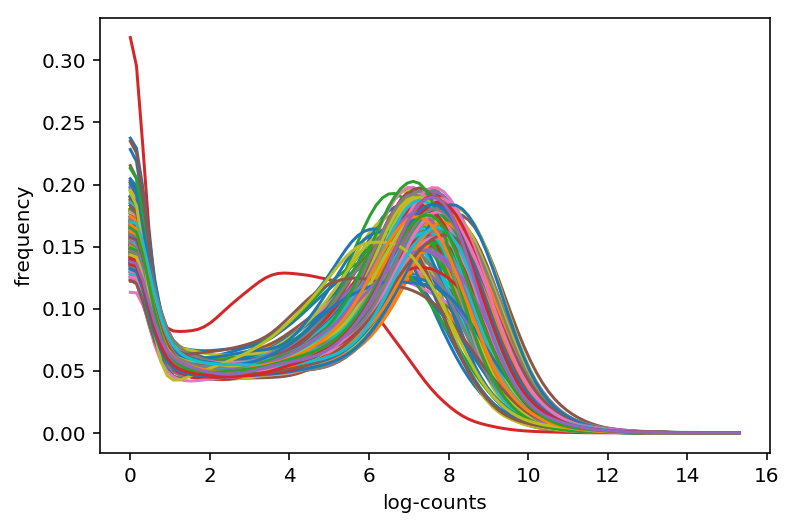

In [64]:
plot_col_density(np.log(expr+1))

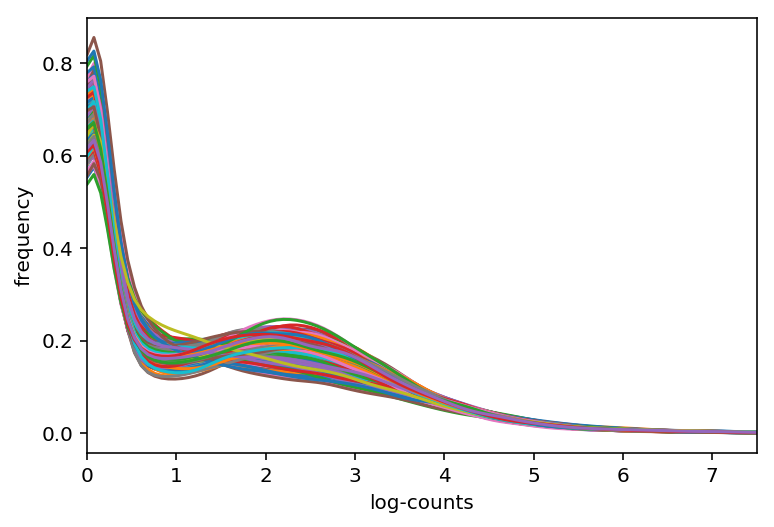

In [67]:
plot_col_density(np.log(rpkm + 1), xlim=(0, 7.5))

### Exercise: 3D broadcasting

Below, produce the array containing the sum of every possible combination of an element in `x` with every element in `y`

In [68]:
x = np.random.random(size=(3, 5))
y = np.random.randint(10, size=8)
z = x + y[:, np.newaxis, np.newaxis] # FIX THIS
print_info(z)

number of elements: 120
number of dimensions: 3
shape: (8, 3, 5)
data type: float64
strides: (120, 40, 8)
flags:
  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False


### Exercise: explicit broadcasting and stride tricks

Use `np.broadcast_arrays` to get the same-shape arrays that numpy adds together. Then use `print_info` on the output. Notice anything weird?

In [71]:
xb, yb = np.broadcast_arrays(x, y[:, np.newaxis, np.newaxis]) 

In [72]:
print_info(xb)

number of elements: 120
number of dimensions: 3
shape: (8, 3, 5)
data type: float64
strides: (0, 40, 8)
flags:
  C_CONTIGUOUS : False
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False


In [74]:
print_info(yb)

number of elements: 120
number of dimensions: 3
shape: (8, 3, 5)
data type: int64
strides: (8, 0, 0)
flags:
  C_CONTIGUOUS : False
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False


In [75]:
xb[0]

array([[ 0.63651617,  0.20074642,  0.55632546,  0.64087161,  0.12806207],
       [ 0.65320185,  0.71880437,  0.48670184,  0.885233  ,  0.37066278],
       [ 0.92037354,  0.39326326,  0.81107983,  0.29452597,  0.8831319 ]])

In [76]:
xb[0, 0, 0] = 1

In [77]:
xb[1]

array([[ 1.        ,  0.20074642,  0.55632546,  0.64087161,  0.12806207],
       [ 0.65320185,  0.71880437,  0.48670184,  0.885233  ,  0.37066278],
       [ 0.92037354,  0.39326326,  0.81107983,  0.29452597,  0.8831319 ]])

## Stride tricks

By manipulating the shape and strides of an array, we can produce a "virtual" array much bigger than its memory usage:

In [78]:
(5,) + (5, 9)

(5, 5, 9)

In [79]:
def repeat(arr, n):
    return np.lib.stride_tricks.as_strided(arr,
                                           shape=(n,) + arr.shape,
                                           strides=(0,) + arr.strides)

In [80]:
repeat(np.random.random(size=5), 4)

array([[ 0.14921111,  0.53045066,  0.72989565,  0.73134049,  0.41674615],
       [ 0.14921111,  0.53045066,  0.72989565,  0.73134049,  0.41674615],
       [ 0.14921111,  0.53045066,  0.72989565,  0.73134049,  0.41674615],
       [ 0.14921111,  0.53045066,  0.72989565,  0.73134049,  0.41674615]])

### Exercise

In [ ]:
x = np.random.random((3, 2)).astype(np.float32)

Try to answer these without looking at `x`. Then, try them out with the `print_info` function.

- What is the shape of `x`?
- What are the strides of `x`?
- Is `x` C-contiguous, F-contiguous, or neither?

Now let `y = repeat(x, 4)`. What is its shape? What are its strides? Is it contiguous?

In [82]:
y = repeat(x, 4)
print_info(y) 
print_info(np.repeat(x, 4)) 

number of elements: 60
number of dimensions: 3
shape: (4, 3, 5)
data type: float64
strides: (0, 40, 8)
flags:
  C_CONTIGUOUS : False
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False
number of elements: 60
number of dimensions: 1
shape: (60,)
data type: float64
strides: (8,)
flags:
  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False


### Exercise: `np.lib.stride_tricks.as_strided`

Use `as_strided` to produce a sliding-window view of a 1D array.

In [83]:
(2,) * 2

(2, 2)

In [86]:
from numpy.lib.stride_tricks import as_strided

def sliding_window(arr, size=2):
    """Produce an array of sliding window views of `arr`
    
    Parameters
    ----------
    arr : 1D array, shape (N,)
        The input array.
    size : int, optional
        The size of the sliding window.
        
    Returns
    -------
    arr_slide : 2D array, shape (N - (size - 1), size)
        The sliding windows of size `size` of `arr`.
        
    Examples
    --------
    >>> a = np.array([0, 1, 2, 3])
    >>> sliding_window(a, 2)
    array([[0, 1],
           [1, 2],
           [2, 3]])
    """
    N = arr.shape[0]
    s = arr.strides[0]
    return as_strided(arr, shape=(N - size + 1, size),
                      strides=(s, s)) 

In [87]:
# test your code here
sliding_window(np.arange(8), 3)

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4],
       [3, 4, 5],
       [4, 5, 6],
       [5, 6, 7]])

### Exercise: mean filtering

Use `sliding_window` to implement mean filtering, in which every value in an array is replaced by the mean of it and its neighbours. This is a basic operation in signal processing.

In [88]:
def mean_filter(signal, window_size=3):
    """Apply a mean filter to the input with the desired window size.
    
    Parameters
    ----------
    signal : 1D array, shape (M,)
        The input signal.
    window_size : int, optional
        The size of the window along which to compute the mean.
        
    Returns
    -------
    filtered : 1D array, shape (M - window_size,)
        The filtered signal.
    """
    return np.mean(sliding_window(signal, window_size), axis=1) 

To test your function, we will use the example of a *difference filter*, which finds the location of changes in a signal using *convolution*. When the signal is perfectly noiseless, it works great:

In [89]:
signal = np.zeros(100, np.float)
signal[30:60] = 1

diff = np.array([1, 0, -1])
from scipy import ndimage as ndi
dsignal = ndi.convolve(signal, diff) 

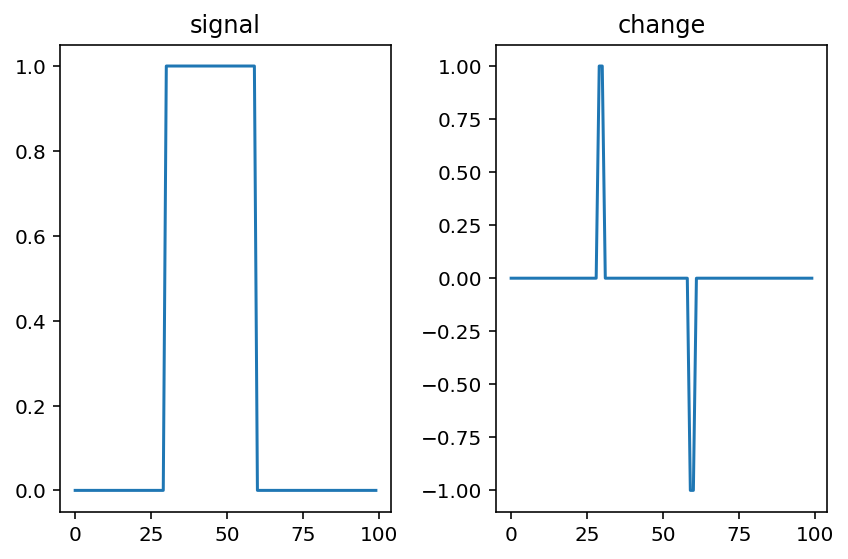

In [90]:
fig, ax = plt.subplots(1, 2)
ax[0].plot(signal)
ax[0].set_title('signal')
ax[1].plot(dsignal)
ax[1].set_title('change')
fig.tight_layout()

However, if the signal is corrupted by noise, a standard difference filter convolution doesn't work:

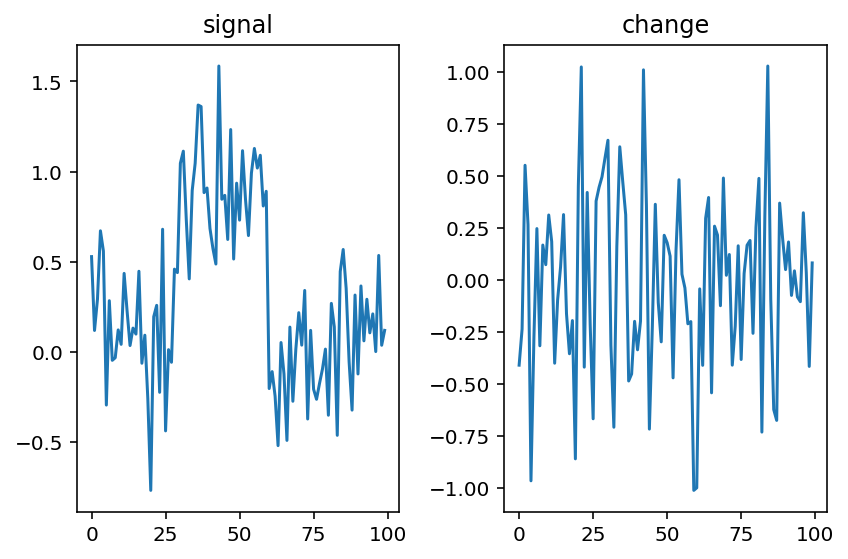

In [91]:
np.random.seed(0)
signal_noisy = signal + np.random.normal(0, 0.3, size=signal.shape)
dsignal_noisy = ndi.convolve(signal_noisy, diff)

fig, ax = plt.subplots(1, 2)
ax[0].plot(signal_noisy)
ax[0].set_title('signal')
ax[1].plot(dsignal_noisy)
ax[1].set_title('change')
fig.tight_layout()

Try mean filtering with different window sizes to see whether the change signal becomes more apparent.

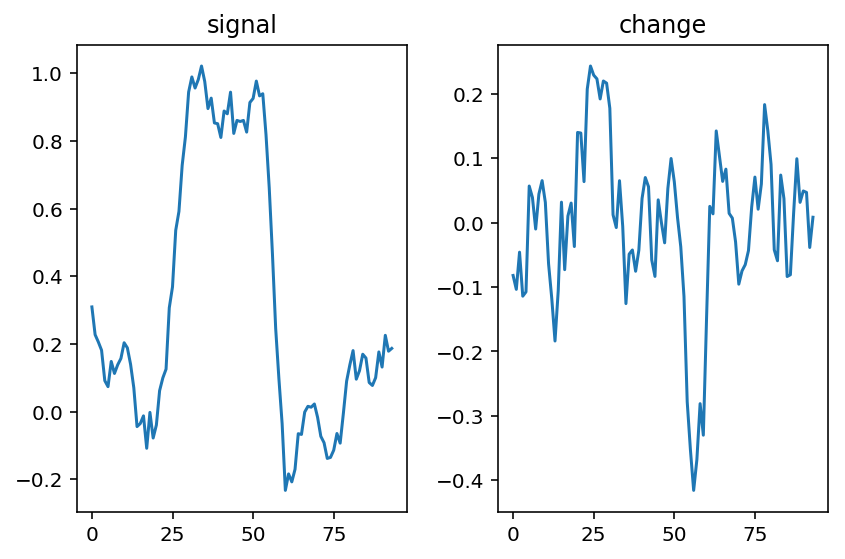

In [92]:
np.random.seed(0)
signal_noisy = signal + np.random.normal(0, 0.3, size=signal.shape)
signal_mean = mean_filter(signal_noisy, 7)
dsignal_mean = ndi.convolve(signal_mean, diff)

fig, ax = plt.subplots(1, 2)
ax[0].plot(signal_mean)
ax[0].set_title('signal')
ax[1].plot(dsignal_mean)
ax[1].set_title('change')
fig.tight_layout()

In [93]:
len(signal_mean)

94

### Exercise: padding

What is the shape of your mean-filtered signal?

...

Oops! We've shortened the signal, which means that our indices have changed: `signal_filtered[i]` does not correspond to the signal around `signal[i]`.

Use `np.pad` to add some "fake" data around `signal` before filtering, so that the filtered result has the same shape as the input.

In [166]:
def mean_filter_padded(signal, window_size=3):
    pad_size = window_size // 2
    signal_padded = np.pad(signal, pad_size, mode='reflect')
    return mean_filter(signal_padded, window_size)

### Exercise: Gaussian filtering

It turns out that mean filtering is not the "optimal" way to recover your signal, assuming certain properties of the noise. For that, we use *Gaussian* filtering, which uses a *weighted* mean of the sliding window elements. The weights are given by the famous Gaussian bell-shaped distribution. For example, here are the weights for a window size of 17:

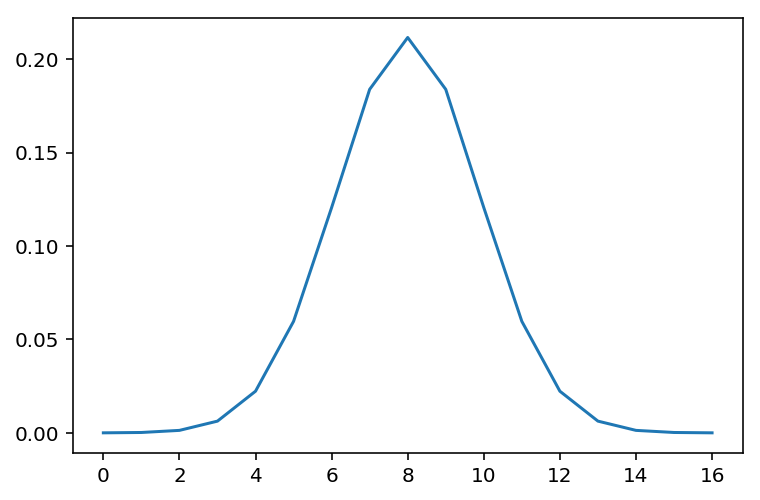

In [162]:
weight = np.exp(-(np.arange(-8, 9) / (8/3))**2)
weight /= np.sum(weight)  ## ensure overall intensity of signal doesn't change
fig, ax = plt.subplots()
ax.plot(weight)

Write a function that uses sliding windows, broadcasting, and axis-wise operations to compute the Gaussian filter of a signal for a given window size. (You should also pad your input.)

In [167]:
def gaussian_filter(signal, window_size=3):
    pad_size = window_size // 2
    sigma = pad_size / 3
    weight = np.exp(-(np.arange(-pad_size, pad_size+1) / sigma)**2)
    weight /= np.sum(weight)
    padded = np.pad(signal, pad_size, mode='reflect')
    windows = sliding_window(signal, window_size)
    weighted = windows * weight  # uses broadcasting
    filtered = np.sum(weighted, axis=1)
    return filtered

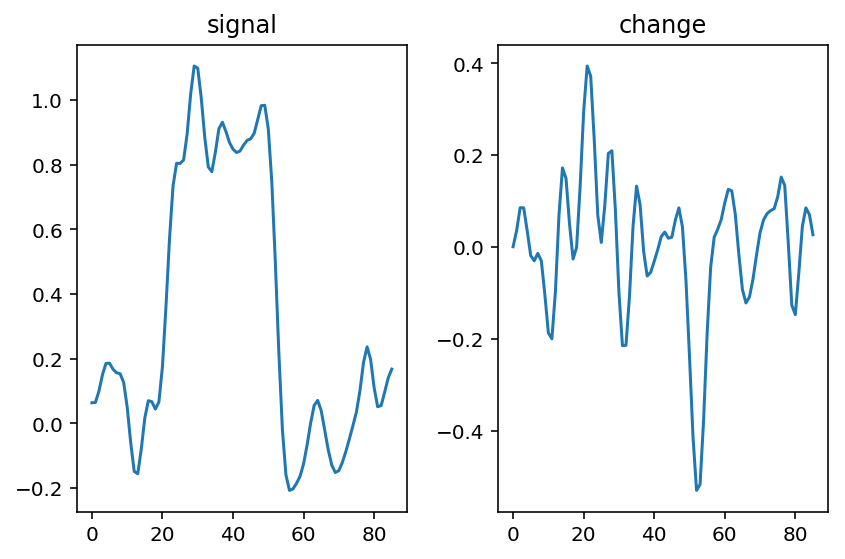

In [170]:
np.random.seed(0)
signal_noisy = signal + np.random.normal(0, 0.3, size=signal.shape)
signal_gauss = gaussian_filter(signal_noisy, 15)
dsignal_gauss = ndi.convolve(signal_gauss, diff)

fig, ax = plt.subplots(1, 2)
ax[0].plot(signal_gauss)
ax[0].set_title('signal')
ax[1].plot(dsignal_gauss)
ax[1].set_title('change')
fig.tight_layout()

# Fancy indexing

You can index arrays with slicing, but also with boolean arrays (including broadcasting!), integer arrays, and individual indices along multiple dimensions.

In [94]:
a[0, 0]

100

In [95]:
a[0]

array([100, 200,  50, 400])

In [96]:
a[:, 0] 

array([100,  50, 350])

In [97]:
a

array([[100, 200,  50, 400],
       [ 50,   0,   0, 100],
       [350, 100,  50, 200]])

In [98]:
a[[1, 2]] 

array([[ 50,   0,   0, 100],
       [350, 100,  50, 200]])

In [99]:
a[[True, False, True]] 

array([[100, 200,  50, 400],
       [350, 100,  50, 200]])

In [100]:
values = np.array([0, 5, 99])
selector = np.random.randint(0, 3, size=(3, 4))
print(selector)
print(values[selector]) 

[[0 0 1 2]
 [1 1 0 0]
 [1 2 0 2]]
[[ 0  0  5 99]
 [ 5  5  0  0]
 [ 5 99  0 99]]


In [101]:
relabeled = values[selector]
has_large_cols = np.any(relabeled > 10, axis=1)
print(relabeled[has_large_cols])

[[ 0  0  5 99]
 [ 5 99  0 99]]


In [102]:
print(relabeled.shape)
print(has_large_cols.shape)

(3, 4)
(3,)


### Exercise

Use boolean indexing and broadcasting to select the columns of `relabeled` that do not contain 99.

In [103]:
has_small_rows = np.any(relabeled < 99, axis=0)
print(has_small_rows.shape)

(4,)


In [104]:
relabeled[has_small_rows[np.newaxis, :]]

/Users/jni/conda/envs/36/lib/python3.6/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 3 but corresponding boolean dimension is 1
  """Entry point for launching an IPython kernel.


array([ 0,  0,  5, 99])

In [105]:
relabeled

array([[ 0,  0,  5, 99],
       [ 5,  5,  0,  0],
       [ 5, 99,  0, 99]])

### Exercise: quantile normalization

Quantile Normalization(https://en.wikipedia.org/wiki/Quantile_normalization) is a method to align distributions. Implement it using NumPy axis-wise operations and fancy indexing.

*Hint: look for documentation for `scipy.stats.rankdata`, `np.sort`, and `np.apply_along_axis`.*

In [120]:
from scipy import stats
stats.rankdata?

In [125]:
def qnorm(X):
    """Quantile normalize an input matrix.
    
    Parameters
    ----------
    X : 2D array of float, shape (M, N)
        The input data, with each column being a
        distribution to normalize.
        
    Returns
    -------
    Xn : 2D array of float, shape (M, N)
        The normalized data.
    """
    ranks = np.apply_along_axis(stats.rankdata, axis=0, arr=X)
    intranks = ranks.astype(int) - 1
    quantiles = np.mean(np.sort(X, axis=0), axis=1)
    Xn = quantiles[intranks]
    return Xn

In [126]:
logexpr = np.log(expr + 1)

In [127]:
logexprn = qnorm(logexpr)

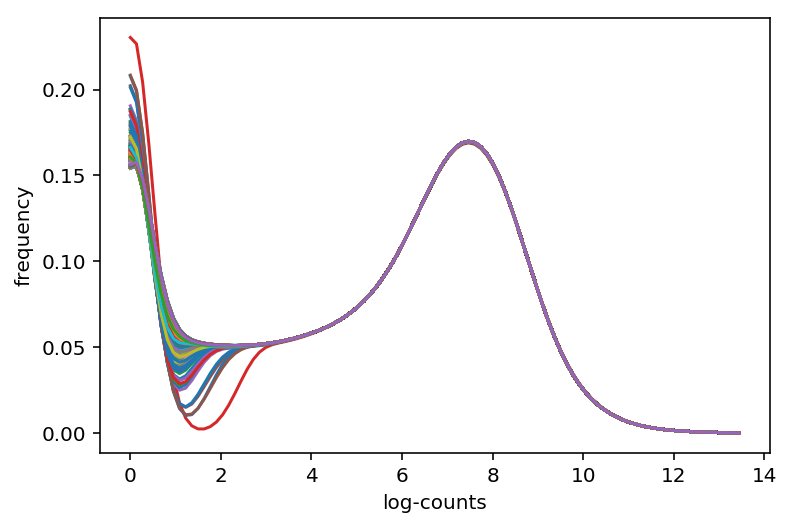

In [128]:
plot_col_density(logexprn)

## Fancy indexing along multiple dimensions

Combining fancy indexing and slicing selects entire rows/columns:

In [106]:
relabeled

array([[ 0,  0,  5, 99],
       [ 5,  5,  0,  0],
       [ 5, 99,  0, 99]])

In [107]:
relabeled[[1, 1, 2], :]

array([[ 5,  5,  0,  0],
       [ 5,  5,  0,  0],
       [ 5, 99,  0, 99]])

In [108]:
relabeled[:, [1, 3, 1]]

array([[ 0, 99,  0],
       [ 5,  0,  5],
       [99, 99, 99]])

In [112]:
relabeled[[1, 2], [1, 3]]  

array([ 5, 99])

In [114]:
a[[0, 1], [0, 1]]  

array([100,   0])

To select individual elements for a new array shape, we must use as many fancy indices as the array has dimensions:

In [115]:
selector_rows = [[0, 0],
                 [1, 2]]
selector_cols = [[0, 3],
                 [1, 2]]

arr = np.arange(12).reshape((3, 4))
print(arr)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [116]:
print(arr[selector_rows, selector_cols])

[[ 0  3]
 [ 5 10]]


One way to think about this is:
- make a "coordinate array", of the shape that you want plus one more axis, to hold the coordinates of each point (see below),
- transpose that final axis to the front, and
- convert to tuple

For the above example, perhaps you find this "notation" more intuitive:

In [117]:
selector_t = [[ [0, 0], [0, 3] ],
              [ [1, 1], [2, 2] ]] 

In [118]:
selector = tuple(np.transpose(selector_t, (2, 0, 1)))
print(selector[0], selector[1], sep='\n')

[[0 0]
 [1 2]]
[[0 3]
 [1 2]]


In [119]:
arr[selector]

array([[ 0,  3],
       [ 5, 10]])

For technical reasons that one might grasp for fleeting moments, the "tuple of index arrays" format is most consistent with other forms of multi-dimensional indexing in NumPy. It is a widespread convention (see e.g. `scipy.ndimage.map_coordinates`), so it's worth practicing.

### Exercise

What happens when you make `selector_col`:
- a single number?
- a 1D array with two elements?
- a 2D array of shape (1, 2)?
- a 1D array with three elements?

Repeat similar experiments with `selector_row`.

Does this remind you of any other NumPy feature we may have seen?

In [129]:
selector_rows = [[0, 0],
                 [1, 2]]
selector_cols = [[0, 3],
                 [1, 2]]

arr = np.arange(12).reshape((3, 4))
print(arr)
arr[selector_rows, selector_cols]

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


array([[ 0,  3],
       [ 5, 10]])

In [132]:
arr[selector_rows, 3]

array([[ 3,  3],
       [ 7, 11]])

In [131]:
arr[selector_rows, [2, 3]]  

array([[ 2,  3],
       [ 6, 11]])

In [133]:
arr[selector_rows, [[2], [3]]]

array([[ 2,  2],
       [ 7, 11]])

In [134]:
arr[selector_rows, [1, 2, 3]]

IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (2,2) (3,) 

... This is broadcasting! Indeed, the row and column index arrays, passed as a tuple to `arr[]`, get broadcast into a single array shape, and this is the shape of the final output.

## Advanced exercise: Jack's dilemma

(If time permits.)

```email
Date: Wed, 16 Jul 2008 16:45:37 -0500
From: Jack Cook
To: <numpy-discussion@scipy.org>
Subject: Numpy Advanced Indexing Question
```

Greetings,

I have an I,J,K 3D volume of amplitude values at regularly sampled
time intervals. I have an I,J 2D slice which contains a time (K)
value at each I, J location. What I would like to do is extract a
subvolume at a constant +/- K window around the slice. Is there an
easy way to do this using advanced indexing or some other method?
Thanks in advanced for your help.

-- Jack

In [136]:
# In the command-line, run `python tools/generate-volume.py`

data = np.load('geo.npz')  # npz file with multiple arrays, keyed like dict
strata, density = data['strata'], data['density']
print(strata.shape, density.shape)

(461, 512, 512) (461, 512, 512)


Let's look at the data we just loaded.

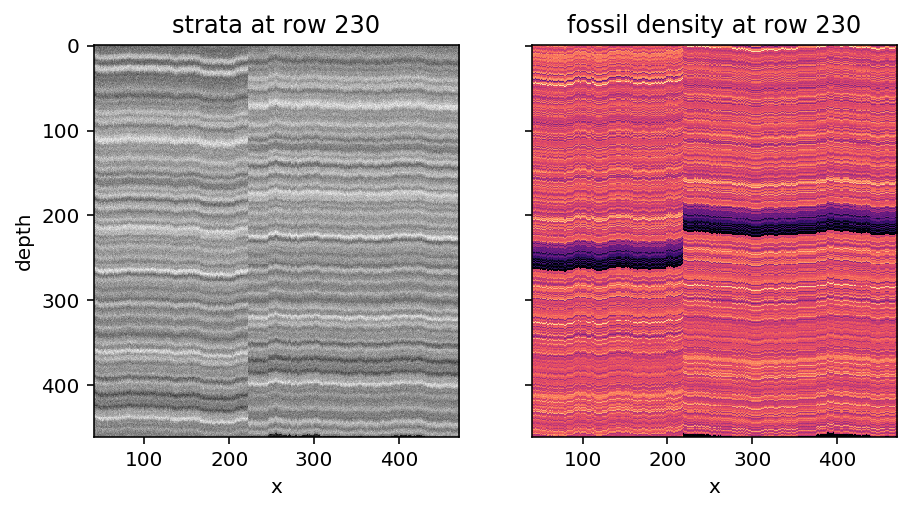

In [137]:
row = strata.shape[0] // 2

fig, (ax0, ax1) = plt.subplots(1, 2, sharey=True, figsize=(7.2, 3.6))
ax0.imshow(strata[:, row, :], cmap='gray')
ax0.set_ylabel('depth')
ax0.set_xlabel('x')
ax0.set_title(f'strata at row {row}')
ax1.imshow(density[:, 256, :], cmap='magma')
ax1.set_xlabel('x')
ax1.set_title(f'fossil density at row {row}') 

### Exercise

We want to quantify the apparent extinction event near a particular stratum. The strata, however, are not perfectly horizontal, and there is a large break in the rock, too. Therefore, we want to align the strata by using the solution to Jack's dilemma (which you must solve for him).

Using a window size of 120 (so the half-width is K=60):
- find the stratum of maximum intensity along the depth axis. This is a 2D slice of integers measuring the depth of the maximum intensity stratum at each (row, column) coordinate.
- using broadcasting, create a volume of shape (2K, Nrow, Ncol) containing the depth coordinate at each (row, column) of your desired window.
- create matching row and column index volumes to perform fancy indexing of the fossil density array.
- extract the subvolume of fossil density around the stratum using fancy indexing
- compute the mean fossil density at each depth.

**-->Advice<--**: play around with a much tinier subset of the volume, say, a subset of size (10, 15, 20), and window size of 3. Evaluating the wrong expression can result in a giant dataset that blows up your memory and crashes your computer. (Yay Science!)

### Solution

We have to first find the stratum of maximum intensity. We call this the *horizon*.

In [140]:
horizon = np.argmax(strata, axis=0) 

We then set the value of $k$:

In [141]:
halfw = 60

Now, we can modify the (2D) horizon to be a 3D (horizon +/- K) volume, using broadcasting, like we did with `z = x[:, np.newaxis] + y`. We call this the `pln_index`, ie plane index.

In [142]:
pln_index = (horizon +
             np.arange(-halfw, halfw)[:, np.newaxis, np.newaxis])

What is the shape of this?

In [143]:
print(pln_index.shape)

(120, 512, 512)


This is what we want! Now, we additionally want to select all rows and all columns:

In [144]:
all_rows = np.arange(pln_index.shape[1])
all_cols = np.arange(pln_index.shape[2])

But of course, we must shape them in such a way that they broadcast correctly. We want:

    pln_index.shape   (120, 512, 512)
    row_index.shape   (  1, 512,   1)
    col_index.shape   (  1,   1, 512)

So:

In [145]:
row_index = all_rows[np.newaxis, :, np.newaxis]
col_index = all_cols[np.newaxis, np.newaxis, :] 

Now we can shift the data using this index!

In [147]:
shifted = density[pln_index, row_index, col_index].astype(float)

IndexError: index 461 is out of bounds for axis 0 with size 461

Oops! It turns out that our horizon and offsets, together, sometimes go out of bounds of the volume array. We actually need a more sophisticated strategy to deal with this data! We'll do the following:

- clip the `pln_index` array to stay within bounds using `np.clip`
- index as before — but some values will be wrong, because of the clipping
- replace the values that were clipped with `np.nan` (not a number)
- instead of `np.mean`, use `np.nanmean`, which ignores `nan`s.

In [149]:
pln_index_clp = np.clip(pln_index, 0, density.shape[0] - 1)
shifted = density[pln_index_clp, row_index, col_index].astype(float)
# (We need type float because int doesn't provide nan)
shifted[pln_index < 0] = np.nan
shifted[pln_index >= density.shape[0]] = np.nan

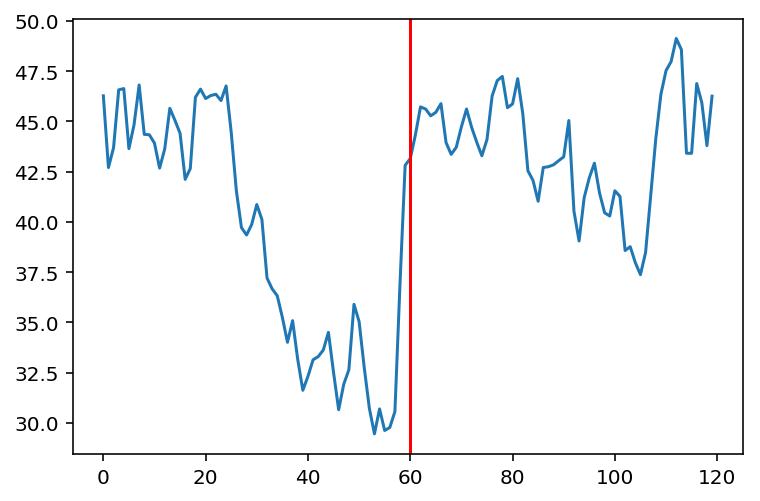

In [150]:
fig, ax = plt.subplots()
ax.plot(np.nanmean(shifted, axis=(1, 2)))  # note multiple axes!
ax.axvline(x=halfw, c='r')
ax.

plt.show(block=True)

Success! We can see that shortly after the "brightest" stratum, the average number of fossil species drops from about 45 to 30. For comparison, see what happens if we take, say, the average across rows and columns, without aligning to the strata:

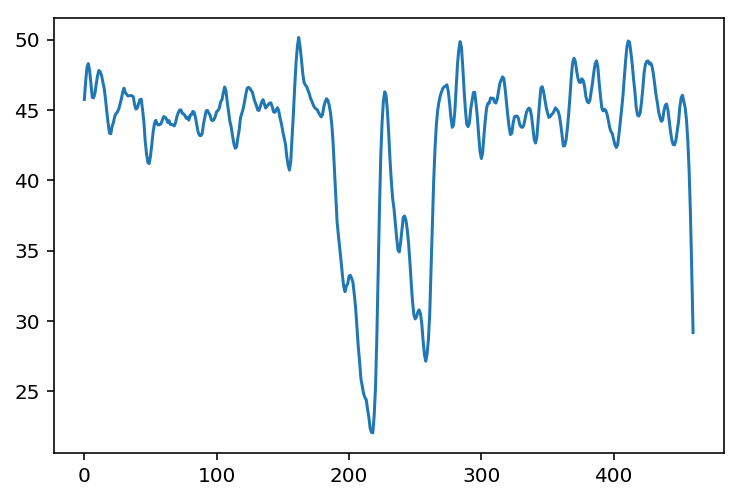

In [152]:
fig, ax = plt.subplots()
ax.plot(np.mean(density, axis=(1, 2))) 

What was once a single extinction event has now become two!

## Linear algebra with NumPy

Since version 3.5, Python supports the matrix multiplication operator, denoted by the `@` symbol. This makes it a new powerhouse for linear algebra.

In [153]:
M = np.array([[0, 1],
              [1, 1],
              [1, 0]])
v = np.array([9, 2])

print(M @ v)

[ 2 11  9]


In [154]:
print(M.T @ M)

[[2 1]
 [1 2]]


Now consider the rotation matrix

$
R = \begin{bmatrix}
  \cos \theta &  -\sin \theta & 0 \\
  \sin \theta & \cos \theta & 0\\
  0 & 0 & 1\\
\end{bmatrix}
$

When $R$ is multiplied with a 3-dimensional column-vector $p =
\left[ x\, y\, z \right]^T$, the resulting vector $R p$ is rotated
by $\theta$ degrees around the z-axis.

In [155]:
theta_deg = 45
theta = np.deg2rad(theta_deg)

c = np.cos(theta)
s = np.sin(theta)

R = np.array([[c, -s, 0],
              [s,  c, 0],
              [0,  0, 1]]) 

In [156]:
x_axis = np.array([1, 0, 0]) 

In [157]:
R @ x_axis

array([ 0.70710678,  0.70710678,  0.        ])

In [158]:
rotated = R @ x_axis
R @ rotated

array([  2.22044605e-16,   1.00000000e+00,   0.00000000e+00])

Note the floating point precision error, but otherwise, two 45º turns result in a 90º turn, as expected.

### Exercise: rotation matrices

If you know some linear algebra, try to answer the following questions about $R$ in your head, before trying them out in Python. If you're totally stuck, just give them a go!

- What does the matrix $S = RR$ do? (Remember, `S = R @ R` in code.)
- What does $R^4 = RRRR$ do?
- The inverse $R^{-1}$ of $R$ is defined as the matrix such that $R^{-1}R = I$, where $I$ is the identity matrix. What does $Q = R^{-1}$ do? (Note: NumPy provides matrix inverse computation in `np.linalg.inv`.)
- What does $R$ do to the vector [0, 0, 1]?
- What does that make the vector [0, 0, 1]?
- Verify this with some function in `np.linalg`. (Look at the online documentation for this module.)
- What does $R^8$ do? What does that make $R^8$?

### Solution

1. Matrix multiplication is associative, meaning you can perform it in any order. We saw that $R(Rx)$ got us to the $y$ axis, a total of 90º of rotation. Thus, $(RR)x = Sx = y$, and $S = RR$ is a 90º rotation matrix! The rotations add up when we multiply the matrices.
2. Now we have added 4 45º rotations, so $R^4$ rotates vectors by 180º around the $z$ axis.
3. If $R^{-1}R = I$, this means that $R^{-1}$ undoes the rotation of $R$, which means that it is rotates 45º *clockwise* around the $z$ axis.
4. This is the $z$ axis. Rotating it around itself does nothing! So it leaves it alone. (You can also check this by doing the matrix multiplication by hand.)
5. $Rz = z$, so $z$ is an eigenvector of $R$ with eigenvalue 1.
6. See the code below.
7. $R^8$ rotates 360º, so it does nothing. That makes it the identity matrix, $I$!

Let's verify all of these in code:

In [160]:
# 1
print('\n1')
S = R @ R
print(f'S is {S}')
print(f'Sx is {S @ x}')

# 2
print('\n2')
R4 = R @ R @ R @ R
print(f'R4 is {R4}')
print(f'R4x is {R4 @ x}')

# 3
print('\n3')
R1 = np.linalg.inv(R)
print(f'R1 is {R1}')
print(f'R1x is {R1 @ x}')

# 4
print('\n4')
z = np.array([0, 0, 1])
print(f'Rz is {R @ z} which is equal to z: {z}')

# 5, 6
print('\n5, 6')
values, Vectors = np.linalg.eig(R)
print(f'The eigenvalues of R are: {values}')
print(f'The corresponding eigenvectors are {Vectors}')

# 7
print('\n7')
I = np.eye(3)
R8 = R4 @ R4
print(f'R8 is {R8}')
print(f'R8 is close to I: {np.allclose(R8, I)}')


1
S is [[  2.22044605e-16  -1.00000000e+00   0.00000000e+00]
 [  1.00000000e+00   2.22044605e-16   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
Sx is [[-0.65320185 -0.71880437 -0.48670184 -0.885233   -0.37066278]
 [ 1.          0.20074642  0.55632546  0.64087161  0.12806207]
 [ 0.92037354  0.39326326  0.81107983  0.29452597  0.8831319 ]]

2
R4 is [[ -1.00000000e+00  -2.77555756e-16   0.00000000e+00]
 [  2.77555756e-16  -1.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
R4x is [[-1.         -0.20074642 -0.55632546 -0.64087161 -0.12806207]
 [-0.65320185 -0.71880437 -0.48670184 -0.885233   -0.37066278]
 [ 0.92037354  0.39326326  0.81107983  0.29452597  0.8831319 ]]

3
R1 is [[ 0.70710678  0.70710678  0.        ]
 [-0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]
R1x is [[ 1.16899024  0.6502206   0.73753167  1.07911891  0.35265172]
 [-0.24522332  0.36632229 -0.04923133  0.1727896   0.1715446 ]
 [ 0

### Exercise: revisiting Gaussian filtering

Above, we performed Gaussian filtering with a broadcast product and a axis-wise sum. Use a matrix multiplication instead.

In [171]:
def gaussian_filter_linalg(signal, window_size=3):
    pad_size = window_size // 2
    sigma = pad_size / 3
    weight = np.exp(-(np.arange(-pad_size, pad_size+1) / sigma)**2)
    weight /= np.sum(weight)
    padded = np.pad(signal, pad_size, mode='reflect')
    windows = sliding_window(signal, window_size)
    # only changes are below
    filtered = windows @ weight  # matrix multiply
    return filtered

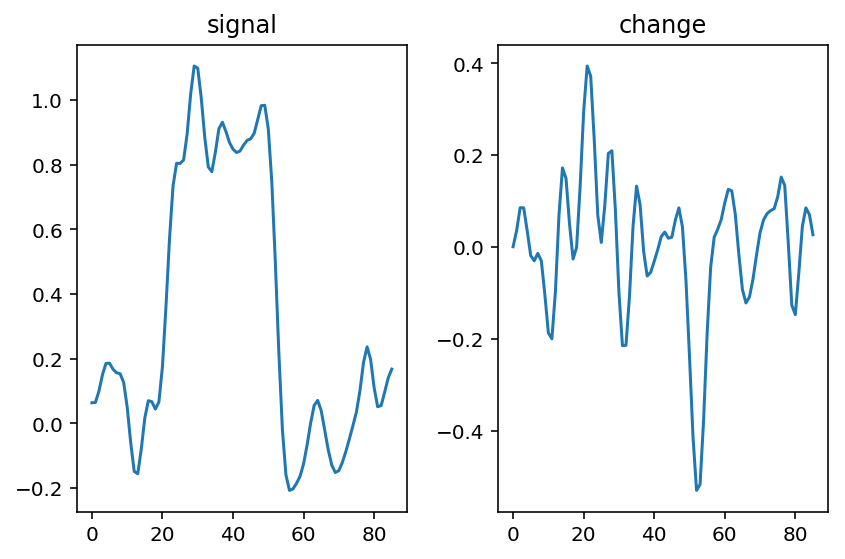

In [172]:
np.random.seed(0)
signal_noisy = signal + np.random.normal(0, 0.3, size=signal.shape)
signal_gauss = gaussian_filter_linalg(signal_noisy, 15)
dsignal_gauss = ndi.convolve(signal_gauss, diff)

fig, ax = plt.subplots(1, 2)
ax[0].plot(signal_gauss)
ax[0].set_title('signal')
ax[1].plot(dsignal_gauss)
ax[1].set_title('change')
fig.tight_layout()

## Neural network with NumPy

We are going to make a toy neural network (with a single neuron =P) using NumPy. We will create our own "features" and "labels" using `np.random.random`. In reality, you would have features (columns) and samples (rows) that you want to learn a label from.

In [173]:
n = 20

In [174]:
np.random.seed(128) 

In [175]:
X = np.random.random(size=(n, 3)) 

- Make a vector y of length n that is 0 at position i if `X[i, 0] + X[i, 2] < 1`, and 1 otherwise.

*Hint:* How do I get the 0th column of X?

*Hint 2:* How can I convert an array of (True/False) to an array of float?

In [176]:
X[2, 1]

0.60144243819237642

In [177]:
y = (X[:, 0] + X[:, 2] > 1).astype(float) 

This is the ground truth for the relationship between our features $X$ and the label $y$. Note that `X[:, 1]` has no effect on the label: it is a random noise feature.

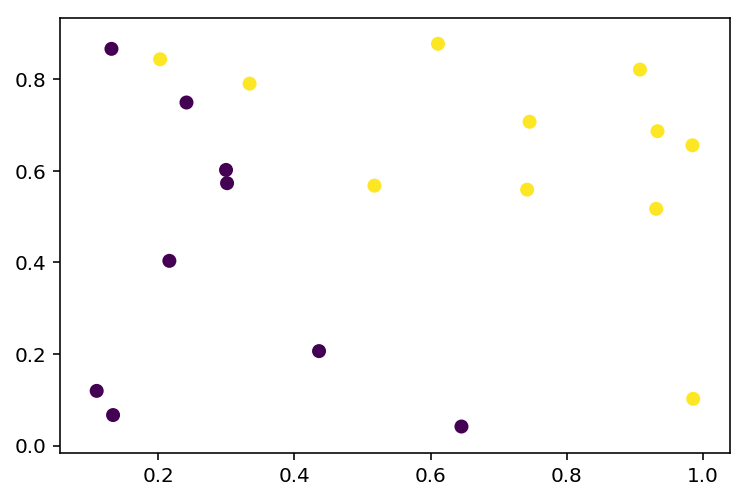

In [179]:
plt.scatter(X[:, 2], X[:, 0], color=plt.cm.viridis(y)) 

In [180]:
X.shape

(20, 3)

In [181]:
X.size

60

In [182]:
Xb = np.column_stack((X, np.ones(X.shape[0])))

In [183]:
W = 2 * np.random.random(size=Xb.shape[1]) - 1

In [184]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [185]:
pred = sigmoid(Xb @ W)

In [186]:
pred

array([ 0.76202521,  0.57756033,  0.68581788,  0.66159432,  0.70912622,
        0.53678587,  0.46267844,  0.59183456,  0.67047114,  0.642228  ,
        0.66995483,  0.59290277,  0.69330257,  0.6999877 ,  0.57868645,
        0.73873742,  0.62142259,  0.63955579,  0.60493592,  0.62944244])

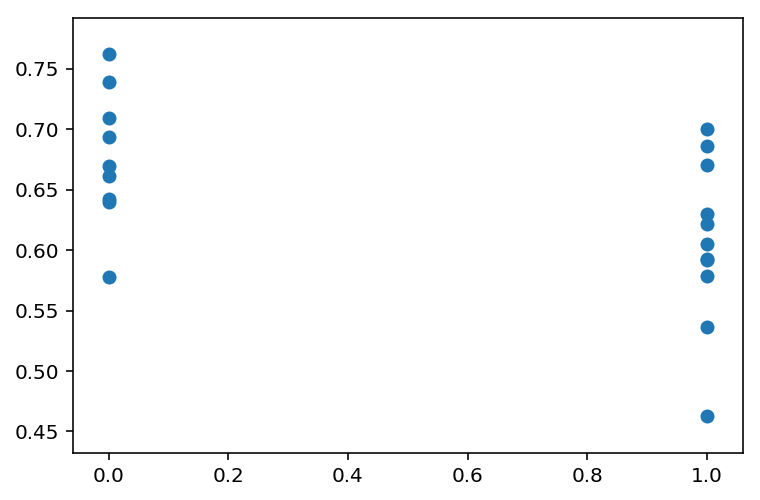

In [187]:
plt.scatter(y, pred)

In [188]:
def dsigmoid(x):
    return x * (1 - x)

In [193]:
def train(X, y, W, n_iter=100):
    W_history = np.empty((n_iter, W.size), dtype=float)
    error_history = np.empty(n_iter, dtype=float)
    W_out = np.copy(W)
    for i in range(n_iter):
        W_history[i] = W_out
        predictions = sigmoid(X @ W_out)
        derror = y - predictions
        gradient = derror * dsigmoid(predictions)  # iamtrask
        update = X.T @ gradient
        error_history[i] = np.sum(np.abs(derror))  # <- fixed typo
        W_out += update
    return W_out, W_history, error_history

In [194]:
Wout, Whist, errhist = train(Xb, y, W, 10000)

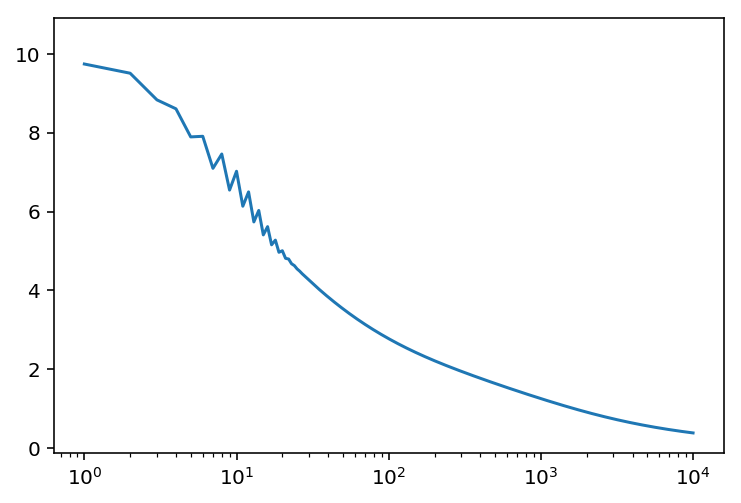

In [195]:
plt.semilogx(errhist)

In [196]:
np.mgrid[0:1:0.3, 0:1:0.3] 

array([[[ 0. ,  0. ,  0. ,  0. ],
        [ 0.3,  0.3,  0.3,  0.3],
        [ 0.6,  0.6,  0.6,  0.6],
        [ 0.9,  0.9,  0.9,  0.9]],

       [[ 0. ,  0.3,  0.6,  0.9],
        [ 0. ,  0.3,  0.6,  0.9],
        [ 0. ,  0.3,  0.6,  0.9],
        [ 0. ,  0.3,  0.6,  0.9]]])

In [197]:
decision_space = np.mgrid[0:1:0.01, 0:1:1, 0:1:0.01, 1:2:1] 

In [198]:
decision_space.shape

(4, 100, 1, 100, 1)

In [199]:
prediction_image = sigmoid(decision_space.T @ Wout).T

In [200]:
prediction_image.shape

(100, 1, 100, 1)

In [201]:
prediction_squeezed = np.squeeze(prediction_image) 

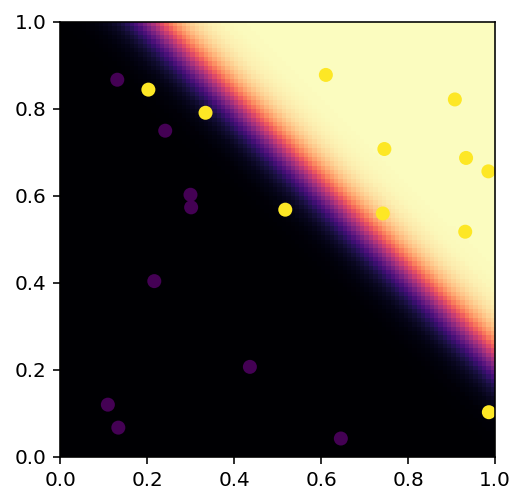

In [202]:
fig, ax = plt.subplots()
ax.imshow(prediction_squeezed, cmap='magma', origin='lower',
          extent=[0, 1, 0, 1])
ax.scatter(X[:, 2], X[:, 0], color=plt.cm.viridis(y)) 

### Exercise

Why do some points appear misclassified?

*Hint:* Look at `Wout`.

In [203]:
Wout

array([ 26.94184036,   9.27352654,  26.49344727, -32.31573733])

Note the relatively high weight given to $W_1$, even though we know that $X_1$ is not relevant in this context. The "real" coefficients, based on how we defined $y$, should be $[a, 0, a, -a]$.

What has happened is that we have *overfit* to the training data, learning something about the $3D$ data points that is not relevant to the function we are trying to learn. Solutions to this overfitting include getting more data, dropout, and *data augmentation*, i.e. adding noise to the existing datapoints and appending the new "corrupted" points to our dataset.

# References and sources

In addition to original content, these notes use materials from the following sources:

- [100 NumPy Exercises](http://www.labri.fr/perso/nrougier/teaching/numpy.100/), compiled by Nicolas Rougier, used here under the terms of the MIT License.
- [SciPy Lecture Notes](http://www.scipy-lectures.org/), compiled by Gaël Varoquaux, Emmanuelle Gouillart, and Olav Vahtras, used under the terms of the CC-BY license.
- [Elegant SciPy](http://elegant-scipy.org), written by Juan Nunez-Iglesias, Stéfan van der Walt, and Harriet Dashnow, used with permission from O'Reilly.
- [iamtrask blog](https://iamtrask.github.io/2015/07/12/basic-python-network/), for a neural network from scratch that inspired this one.

They are all freely available online and worth checking out in their entirety!